# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

Required Libraries for EDA:

In [76]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

We set an option to see all columns values of the data

In [2]:
pd.set_option('display.max_columns', None)

Load the dataset:

In [3]:
df = pd.read_csv("2016_Accidents_UK.csv", low_memory=False)

# 2- EDA

Showing the first 5 rows of the dataset:

In [4]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,02:30,Brent,Brent,Brent,A,4006,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,00:37,Bexley,Bexley,Bexley,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,01:25,Hillingdon,Hillingdon,Hillingdon,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,09:15,Merton,Merton,Merton,A,217,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,217.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,07:53,Hounslow,Hounslow,Hounslow,A,312,Dual carriageway,40.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


Getting the size of the dataset:

In [5]:
df.shape

(136621, 36)

Showing statistics that summarize the central tendency of the variables:

In [6]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,136621.0,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136584.000000
mean,2016.0,448699.363169,2.883354e+05,-1.304881,52.482399,1.848179,1.327644,37.943683
std,0.0,95230.253169,1.570588e+05,1.398947,1.414390,0.710117,0.789296,14.041669
min,2016.0,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,20.000000
25%,2016.0,386355.750000,1.764248e+05,-2.204357,51.473779,1.000000,1.000000,30.000000
50%,2016.0,454126.000000,2.374855e+05,-1.201205,52.025165,2.000000,1.000000,30.000000
75%,2016.0,527660.000000,3.897438e+05,-0.159708,53.401675,2.000000,1.000000,40.000000
max,2016.0,655256.000000,1.178623e+06,1.757858,60.490191,16.000000,58.000000,70.000000


Getting a short summary of our dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               136621 non-null  object 
 1   accident_year                                136621 non-null  int64  
 2   accident_reference                           136621 non-null  object 
 3   location_easting_osgr                        136614 non-null  float64
 4   location_northing_osgr                       136614 non-null  float64
 5   longitude                                    136614 non-null  float64
 6   latitude                                     136614 non-null  float64
 7   police_force                                 136621 non-null  object 
 8   accident_severity                            136621 non-null  object 
 9   number_of_vehicles                           136621 non-nul

Checking if there are any duplicated rows in the dataset:

In [8]:
df.duplicated().sum()

0

Study of relationships between variables:

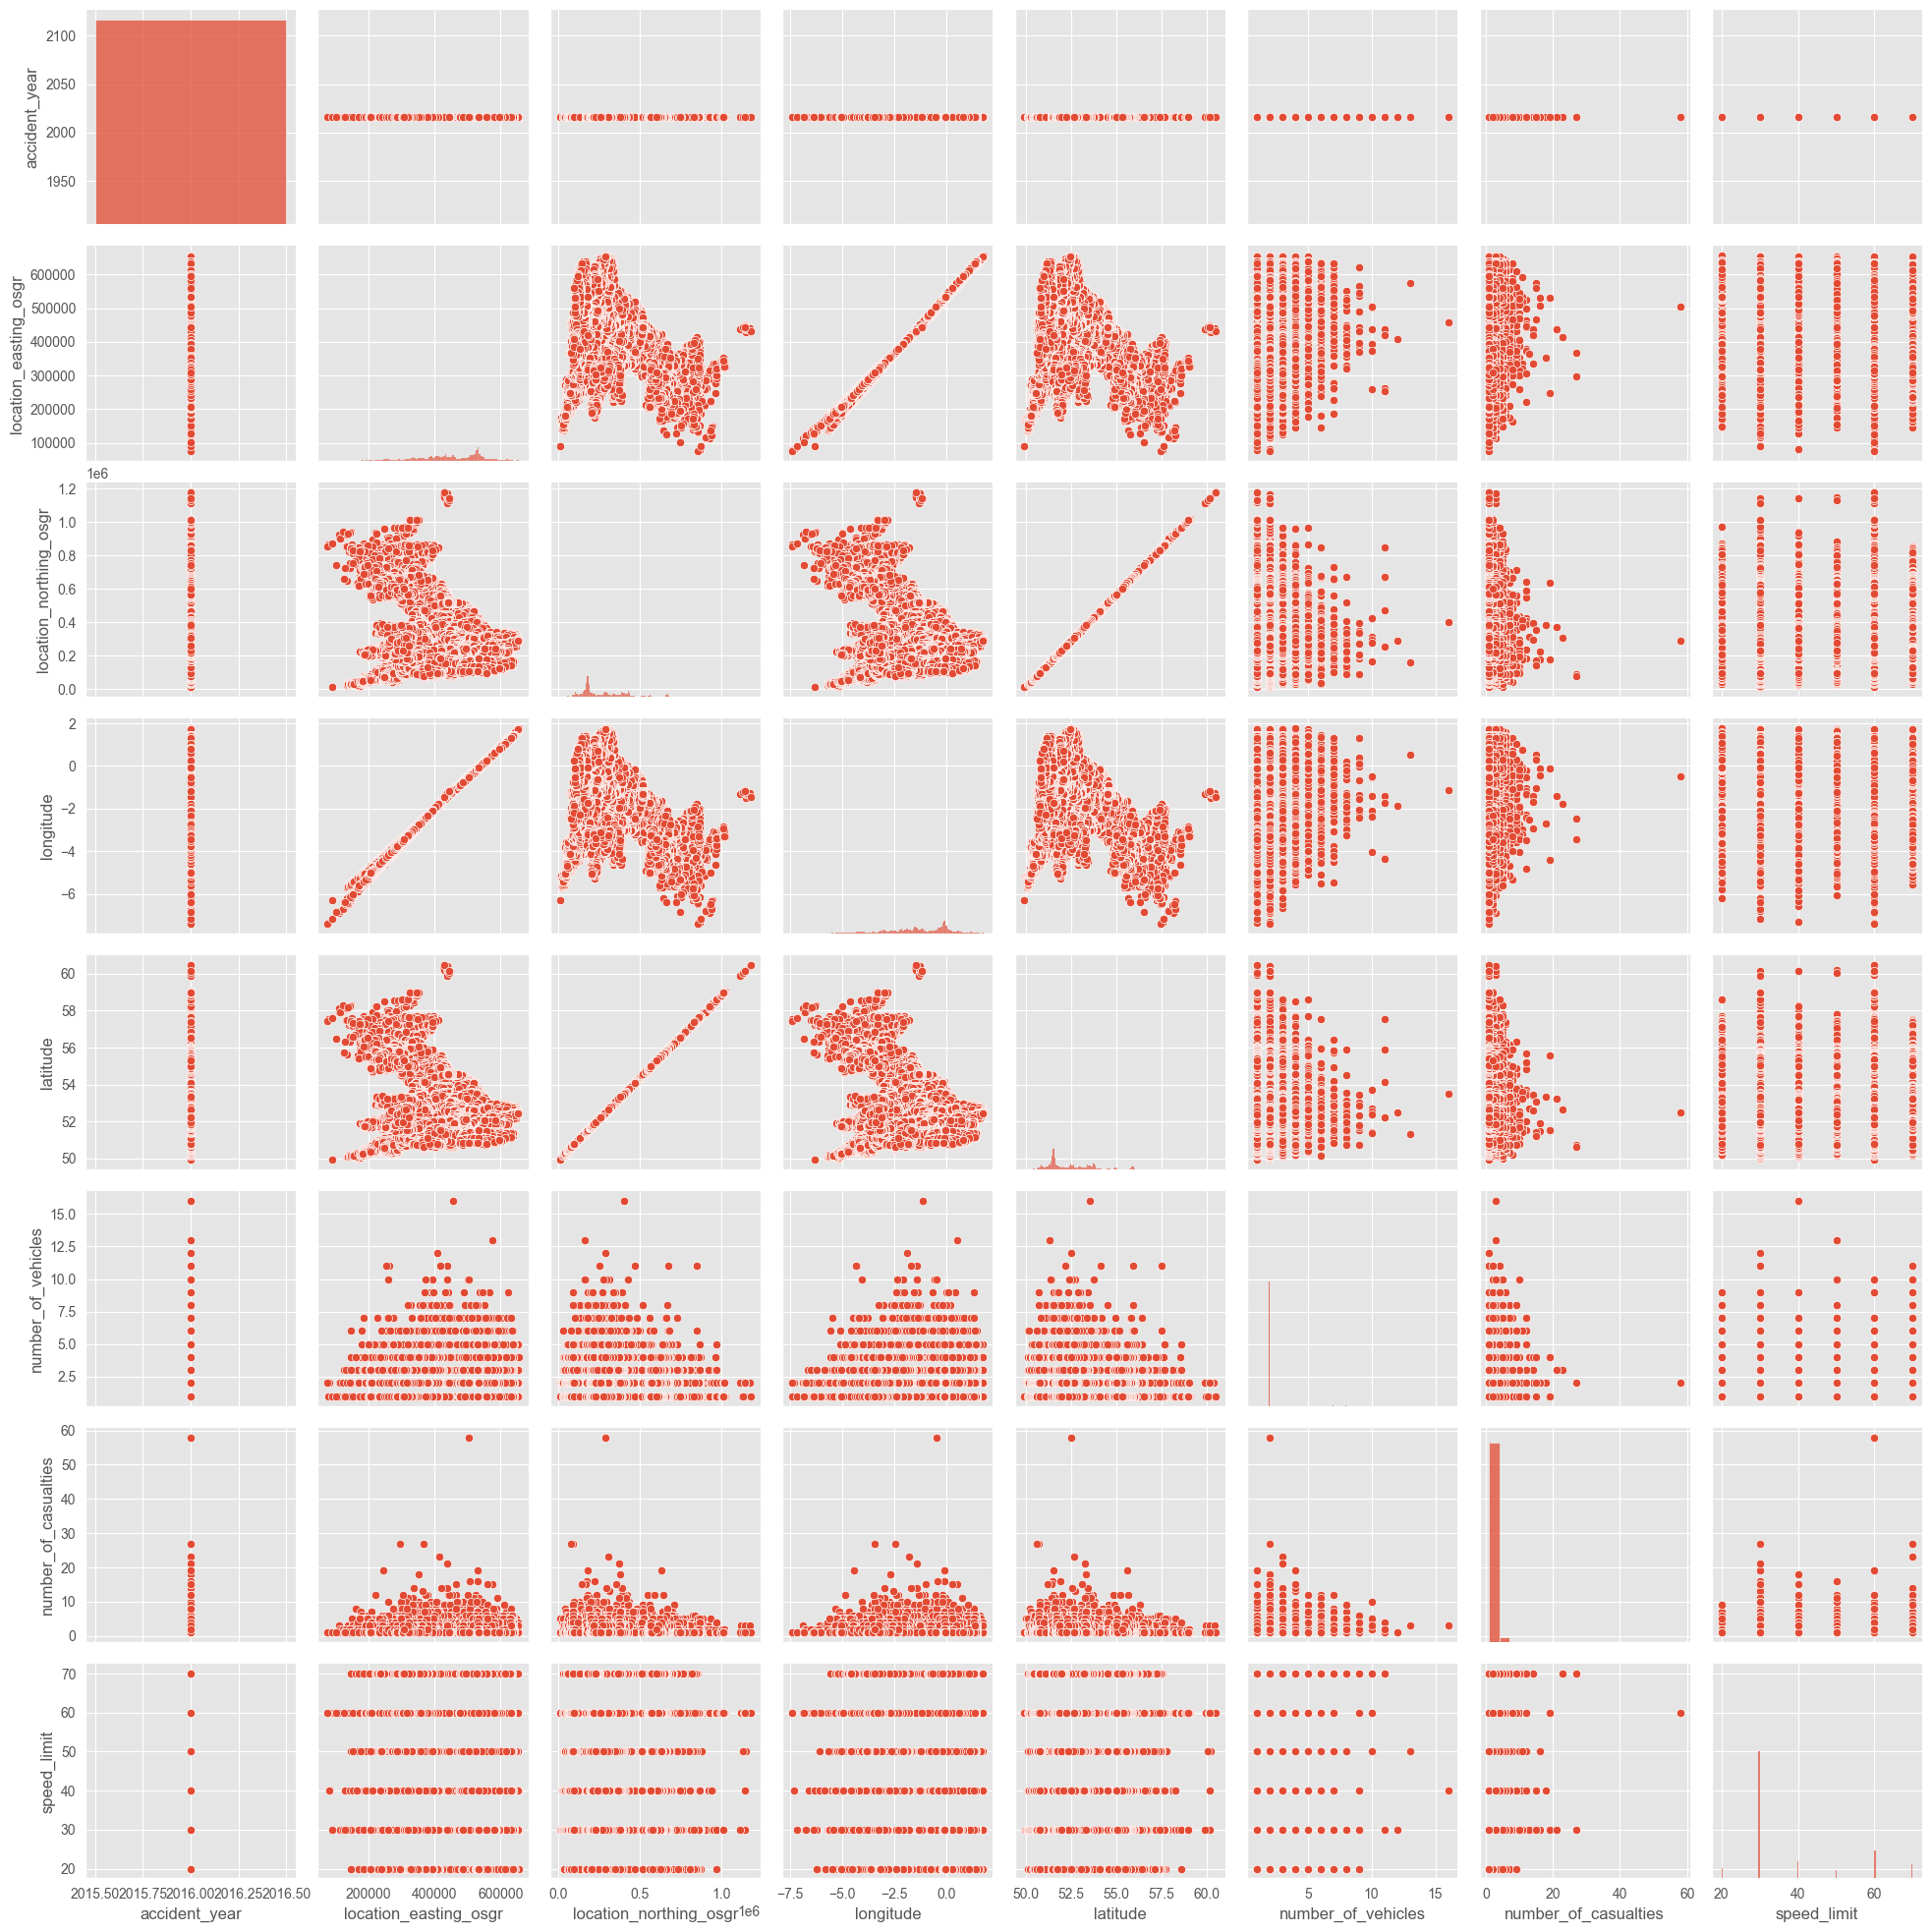

In [9]:
sns.pairplot(df)

Knowing which variables are strongly correlated with each other:

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3936\3101994207.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


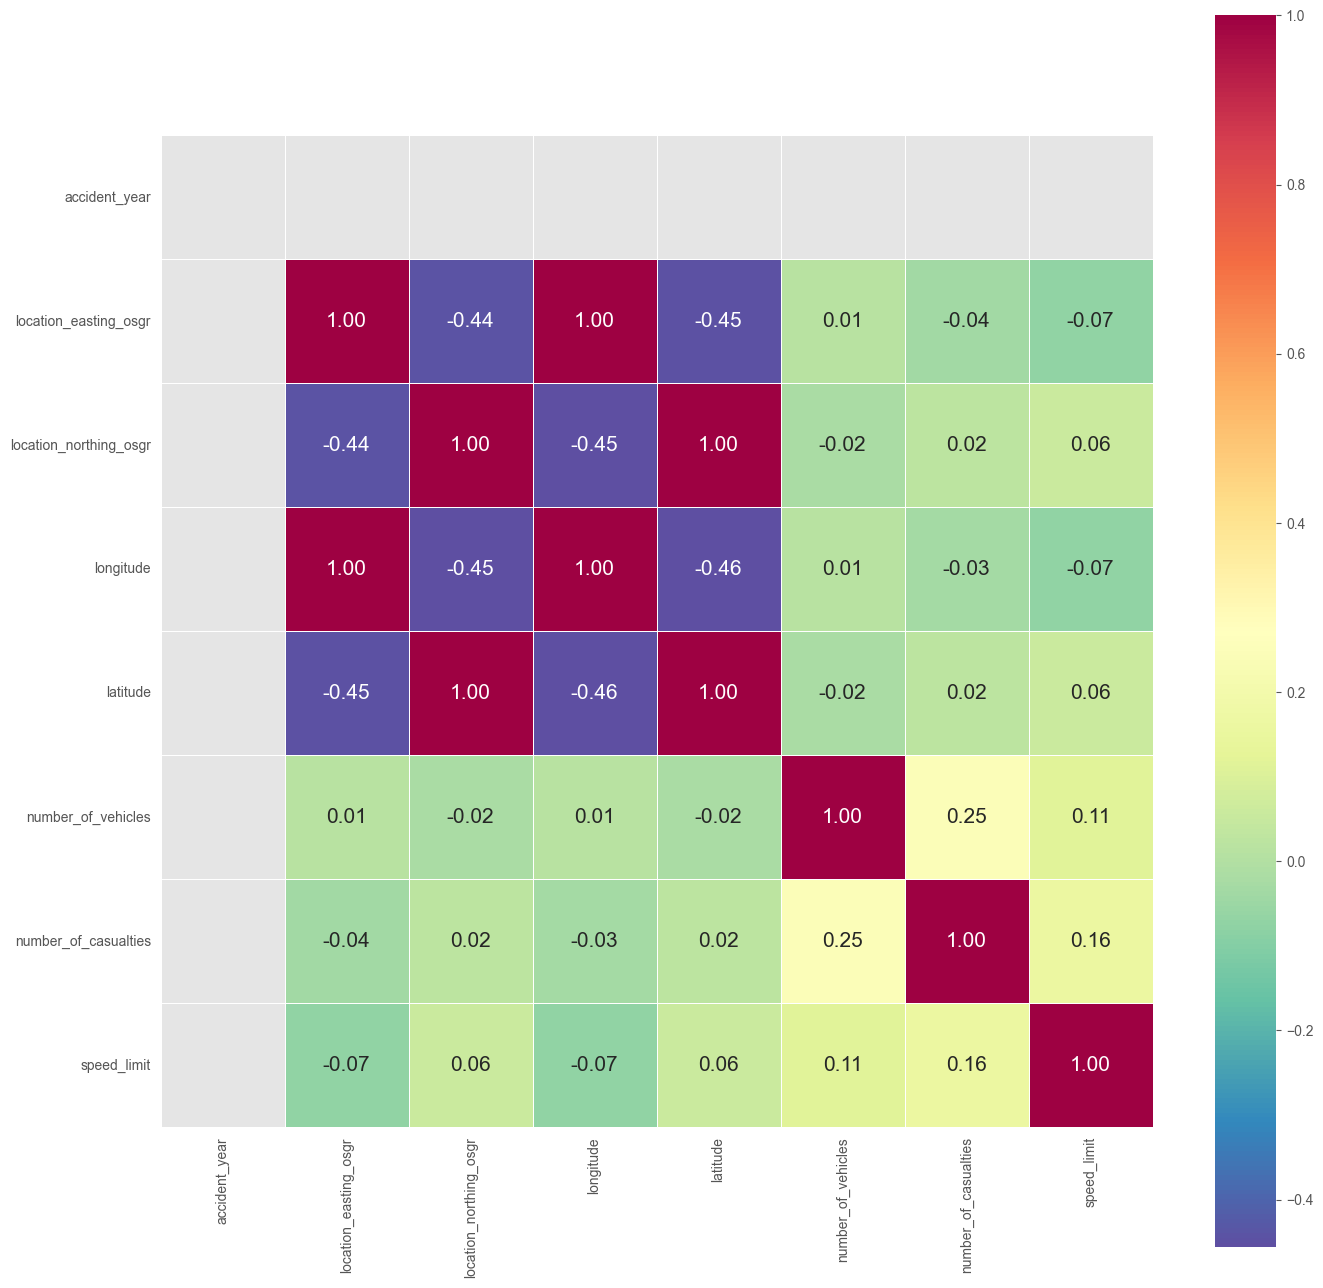

In [10]:
corrmat = df.corr()
plt.figure(figsize = (16,16))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 linewidths=0.5,
                 annot_kws={'size': 15},
                 cmap="Spectral_r")
plt.show()

## Observations:

1- The dataset contains the data of accidents.
2- The number of accidents in the dataset is 136621 each of them has an index and another 35 piece of information that describe the accident.
3- All the accidents in the dataset happened in 2016.
4- At least one vehicle got affected in each accident and at most 16 vehicle got affected.
5- At least one casualty in each accident and at most 58 ones.
6- speed limit of vehicles in the accidents goes from 20 to 70.
7- Some of columns cotain null values which are (location_easting_osgr, location_northing_osgr, longitude, latitude, speed_limit, second_road_number, weather_conditions).
8- The information about second_road_number is missing alot in the dataset.
9- There are no duplicated rows in the dataset.
10- location_easting_osgr and longitude are very correlated to each other.
11- location_northing_osgr and latitude are very correlated to each other.
12- number_of_vehicles and number_of_casualties are strongly positive correlated.
13- speed_limit and number_of_casualties are strongly positive correlated.

What the effect of the weekends on the number of accidents?
The number of accidents is the least during the weekends relative to the number of accidents in the other days.

In [11]:
def CountPlot(columnName):
  sns.countplot(data=df, x=columnName)
  plt.title('Bar Plot for '+ columnName)
  plt.show()

def BoxPlot(columnName):
  sns.boxplot(x=columnName, data=df)
  plt.title('Boxplot of '+columnName)
  plt.show()

def CountPlot2(columnName1, columnName2):
  sns.countplot(data=df, x=columnName1, hue=columnName2)
  plt.title('Bar Plot for '+columnName1)
  plt.show()

def ScatterSum(columnName1, columnName2):
  count = df.groupby([columnName1])[columnName2].sum()
  plt.xlabel(columnName1)
  plt.ylabel(columnName2)
  plt.title(columnName2+' VS. '+columnName1)
  plt.scatter(count.index,count)
  plt.show()

def ScatterAverage(columnName1, columnName2):
  average = df.groupby([columnName1])[columnName2].sum()/ df.groupby([columnName1])[columnName2].count()
  plt.xlabel(columnName1)
  plt.ylabel(columnName2)
  plt.title(columnName2+' VS. '+columnName1)
  plt.scatter(average.index,average)
  plt.show()


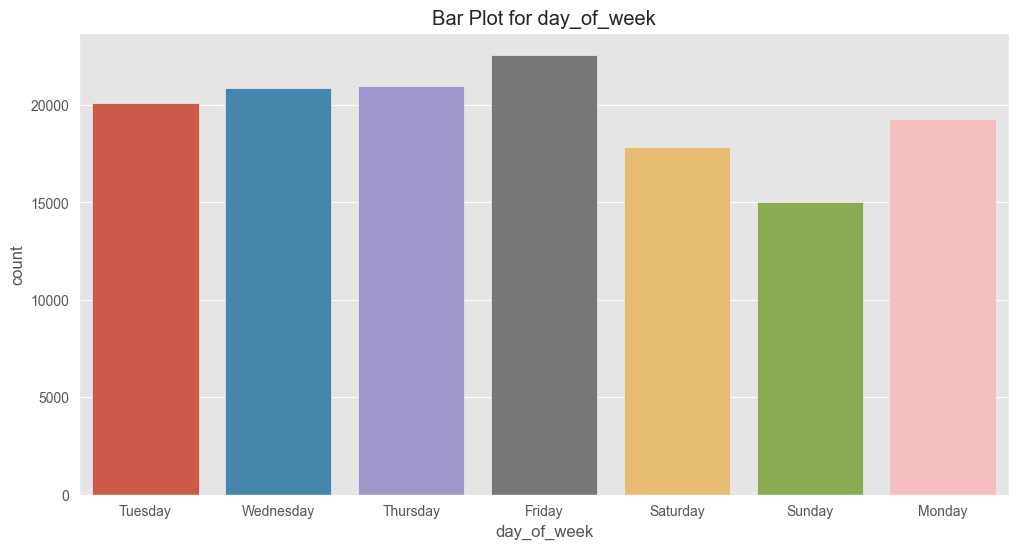

In [12]:
CountPlot("day_of_week")

How does the speed limit affect the accidents?
The high speed limits don't cause high number of accidents as the most accidents are ranging between 20 to 50.

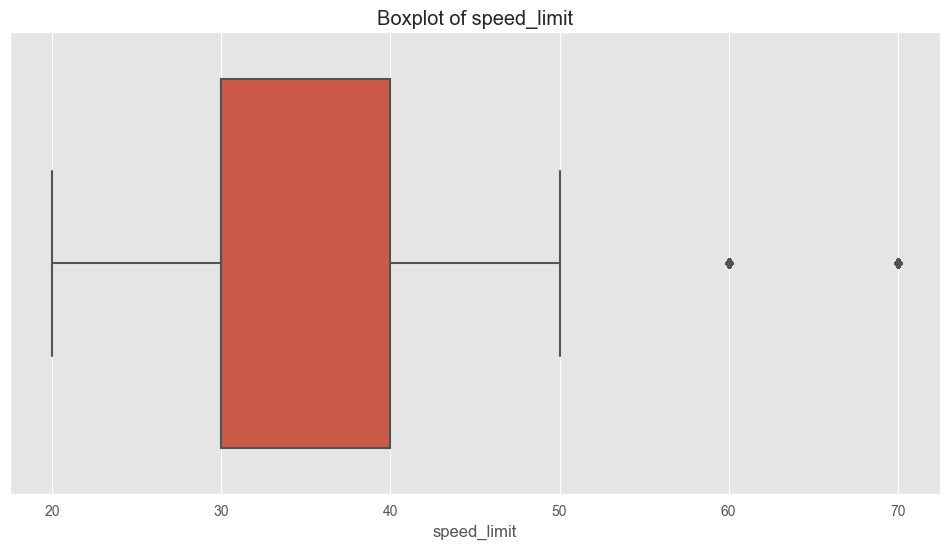

In [13]:
BoxPlot("speed_limit")

What the number of vehicles in the accidents?
The number of vehicles is ranging between 1 - 3 however some accidents have up to 16 vehicles.

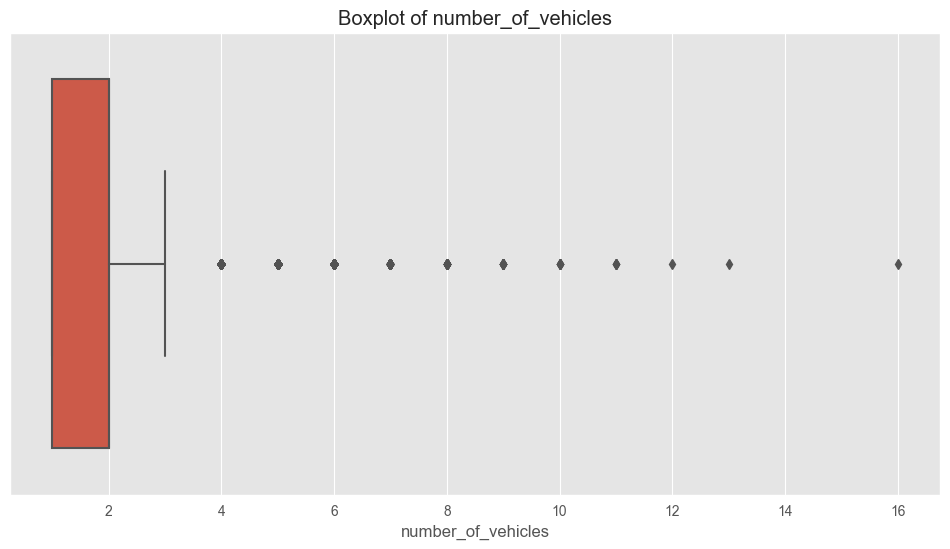

In [14]:
BoxPlot("number_of_vehicles")

What is the effect of the road and area type on the number of accidents?
The most of the accidents happened in Urban areas and in single carriage ways.

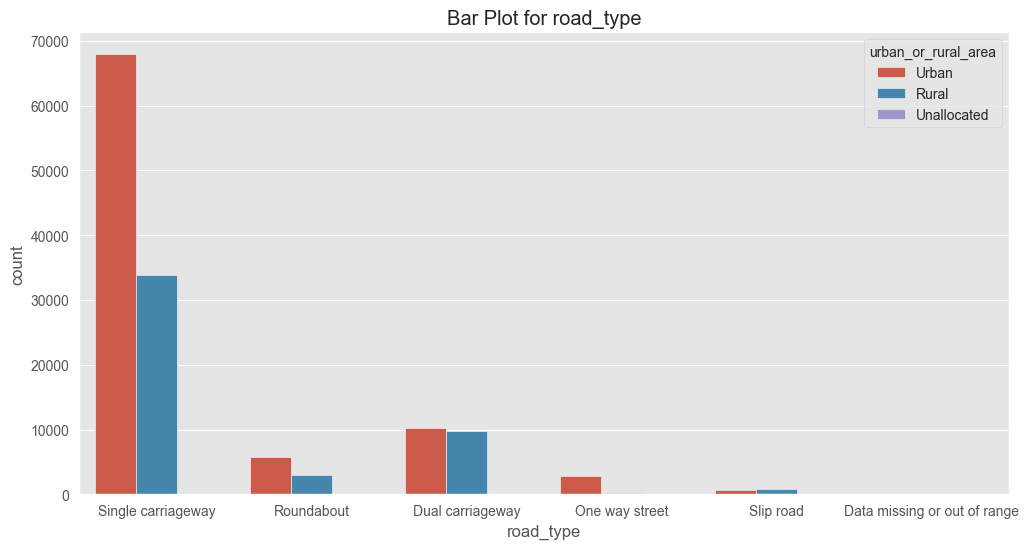

In [15]:
CountPlot2("road_type", "urban_or_rural_area")

What is the effect of the light conditions and weather conditions on the number of accidents?
The most accidents happened during the day and with fine weather.

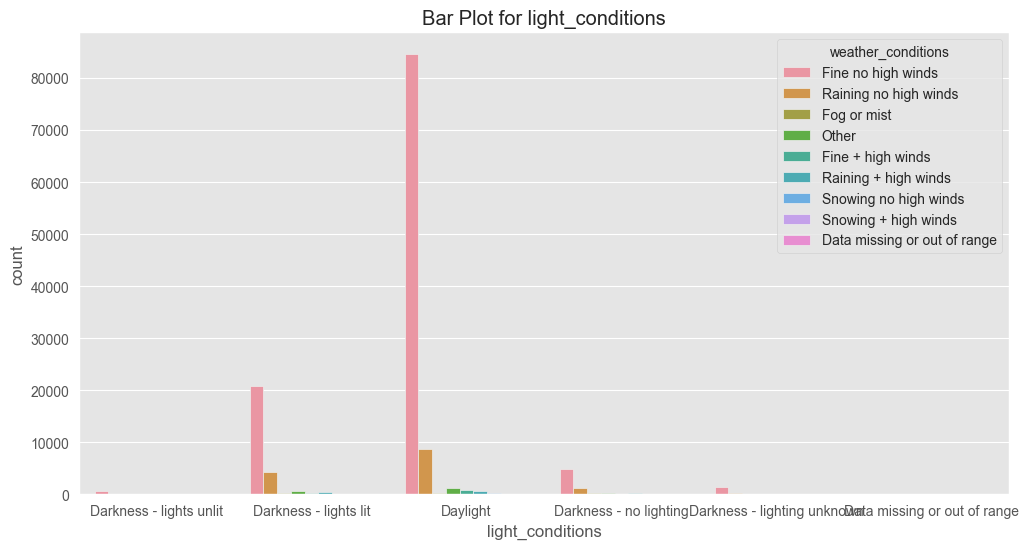

In [16]:
CountPlot2("light_conditions", "weather_conditions")


What is the relation between the number of casualties and the number of vehicles in the accidents?
Almost all casualties are in 1 or 2 vehicles accidents.

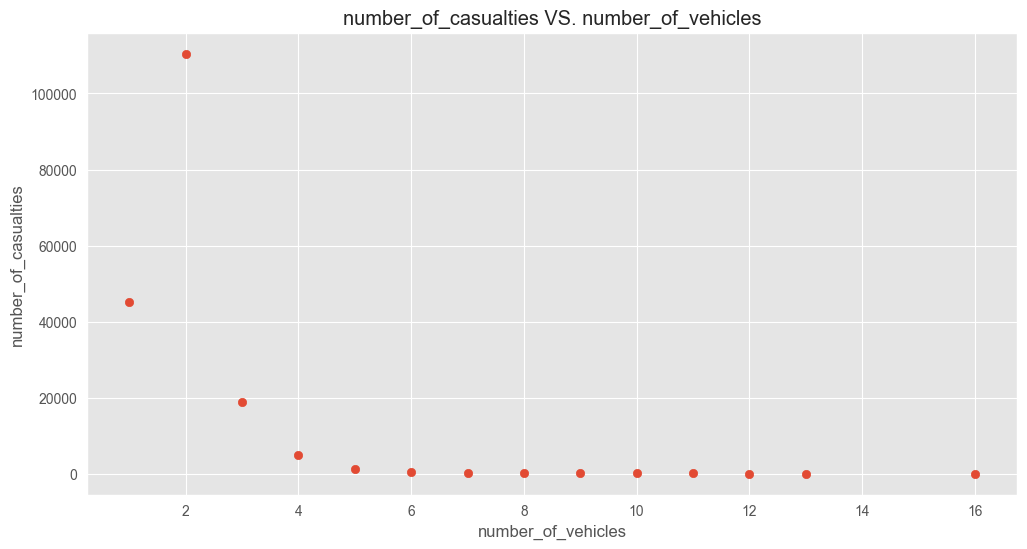

In [17]:
ScatterSum("number_of_vehicles","number_of_casualties")

How does the speed limit affect the number of casualties?
Almost all casualties happened in 30 and 60 speed limits.

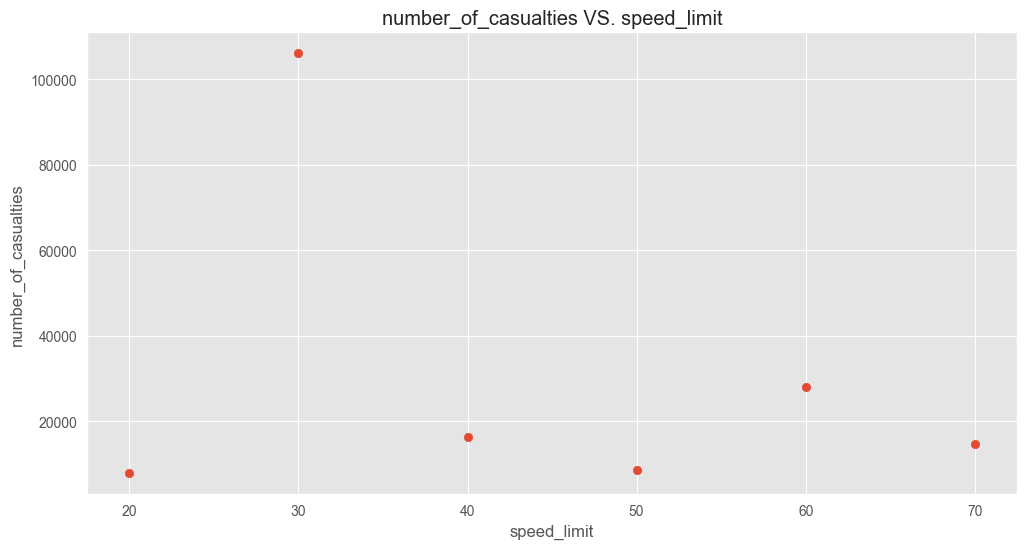

In [18]:
ScatterSum("speed_limit","number_of_casualties")

What is the effect of junction control on the number casualties?
Almost all accidents happened in uncontrolled junctions.

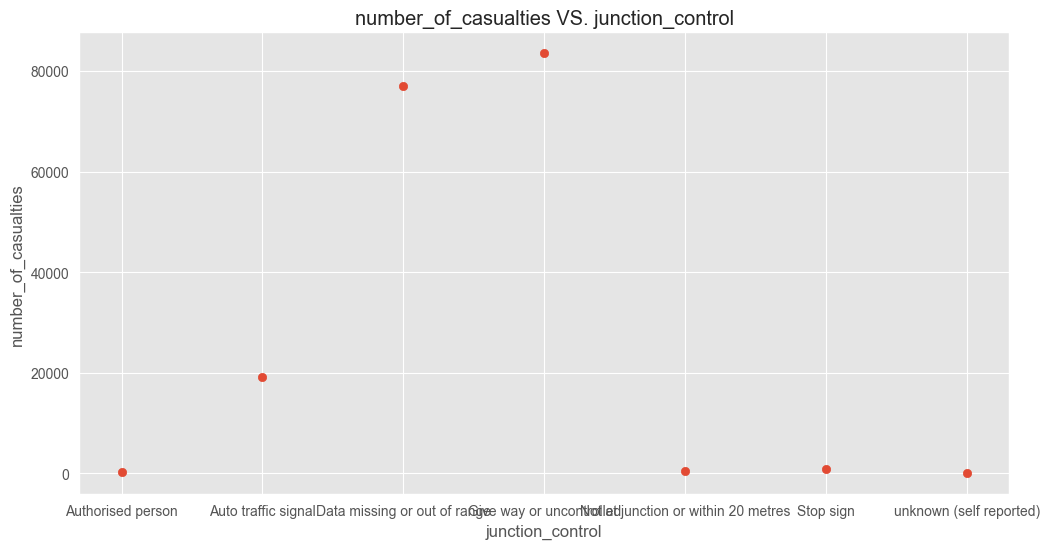

In [19]:
ScatterSum("junction_control","number_of_casualties")

How does the road type affect the average of number of casualties?
The highest average of number of casualties is in the accidents with missing data about road type.

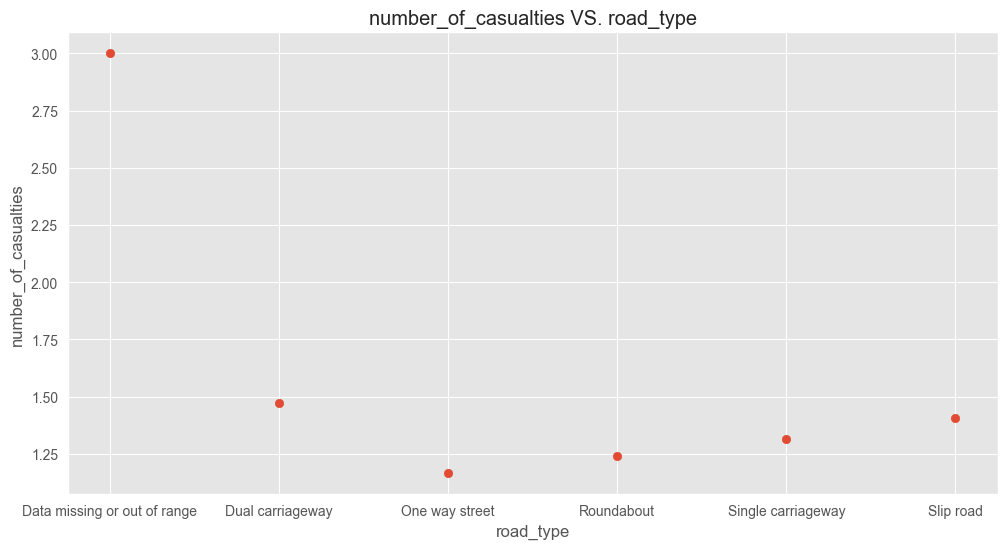

In [20]:
ScatterAverage("road_type", "number_of_casualties")

How does the junction affect the number of vehicles in the accidents?
The slip roads have the highest average of number of vehicles in the accidents.

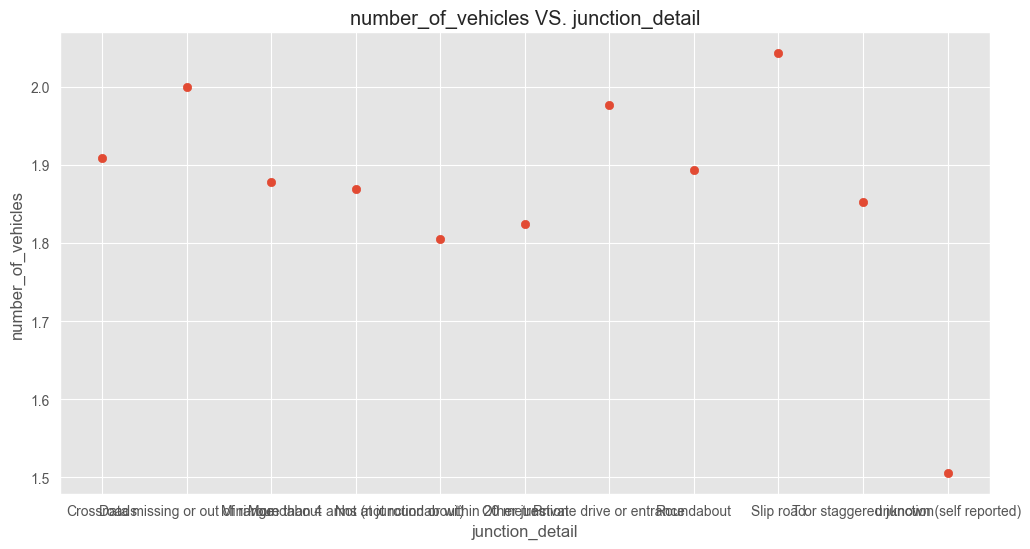

In [21]:
ScatterAverage("junction_detail", "number_of_vehicles")

# 3 - Cleaning Data

## Observing missing Data

Let's look at how many null values we have in the dataset

In [22]:
def get_nan_count(dataset: pd.DataFrame, percentage=False, nan_word=None):
    if(nan_word == None):
        null_cnt = dataset.isnull().sum()
    else:
        null_cnt = (dataset == nan_word).sum()
    null_cnt = null_cnt[null_cnt > 0]
    if(percentage):
        null_cnt = null_cnt * 100 / len(dataset)
    return null_cnt

dataset = df
get_nan_count(dataset), get_nan_count(dataset, percentage=True)

(location_easting_osgr         7
 location_northing_osgr        7
 longitude                     7
 latitude                      7
 road_type                  1399
 speed_limit                  37
 second_road_number        57007
 weather_conditions         3813
 dtype: int64,
 location_easting_osgr      0.005124
 location_northing_osgr     0.005124
 longitude                  0.005124
 latitude                   0.005124
 road_type                  1.024001
 speed_limit                0.027082
 second_road_number        41.726382
 weather_conditions         2.790933
 dtype: float64)

### Missing location values

For location columns [location_easting_osgr, location_northing_osgr, longitude, latitude] we have 7 missing records, let's look at them

In [23]:
dataset[dataset['longitude'].isna()]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
62592,2016210125234,2016,210125234,NaN,NaN,NaN,NaN,Staffordshire,Serious,2,1,07/11/2016,Monday,06:00,Stafford,Stafford,Staffordshire,Unclassified,first_road_class is C or Unclassified. These r...,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Unallocated,Yes,Non-trunk,-1
62618,2016210126357,2016,210126357,NaN,NaN,NaN,NaN,Staffordshire,Slight,1,1,10/11/2016,Thursday,16:40,Stoke-on-Trent,Stoke-on-Trent,Stoke-on-Trent,A,5272,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Unallocated,Yes,Non-trunk,-1
83330,2016400135181,2016,400135181,NaN,NaN,NaN,NaN,Bedfordshire,Slight,3,3,28/11/2016,Monday,07:55,Bedford,Bedford,Bedford,B,645,Single carriageway,60.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Unallocated,Yes,Non-trunk,-1
129439,2016930000146,2016,930000146,NaN,NaN,NaN,NaN,Tayside,Slight,1,1,24/04/2016,Sunday,15:43,Perth and Kinross,Perth and Kinross,Perth and Kinross,A,9,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Unallocated,Yes,Data missing or out of range,-1
132298,2016961600599,2016,961600599,NaN,NaN,NaN,NaN,Central,Slight,2,3,15/04/2016,Friday,13:30,Stirling,Stirling,Stirling,A,872,Data missing or out of range,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range,Data missing or out of range,None,Data missing or out of range,Unallocated,No,Data missing or out of range,-1
132431,2016961601188,2016,961601188,NaN,NaN,NaN,NaN,Central,Serious,2,1,03/08/2016,Wednesday,08:54,Stirling,Stirling,Stirling,A,81,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining no high winds,Wet or damp,None,None,Unallocated,Yes,Data missing or out of range,-1
132527,2016961601508,2016,961601508,NaN,NaN,NaN,NaN,Central,Slight,1,1,26/09/2016,Monday,08:40,Stirling,Stirling,Stirling,A,820,Single carriageway,30.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Unallocated,No,Data missing or out of range,-1


Looking at these data, there's no common pattern or explanation between theses records. The missing data for location is MCAR.

### Missing road type values

Let's look at the road type different values and their count

Values count of road type
Single carriageway              101687
Dual carriageway                 20117
Roundabout                        8865
One way street                    3117
Slip road                         1435
NaN                               1399
Data missing or out of range         1
Name: road_type, dtype: int64


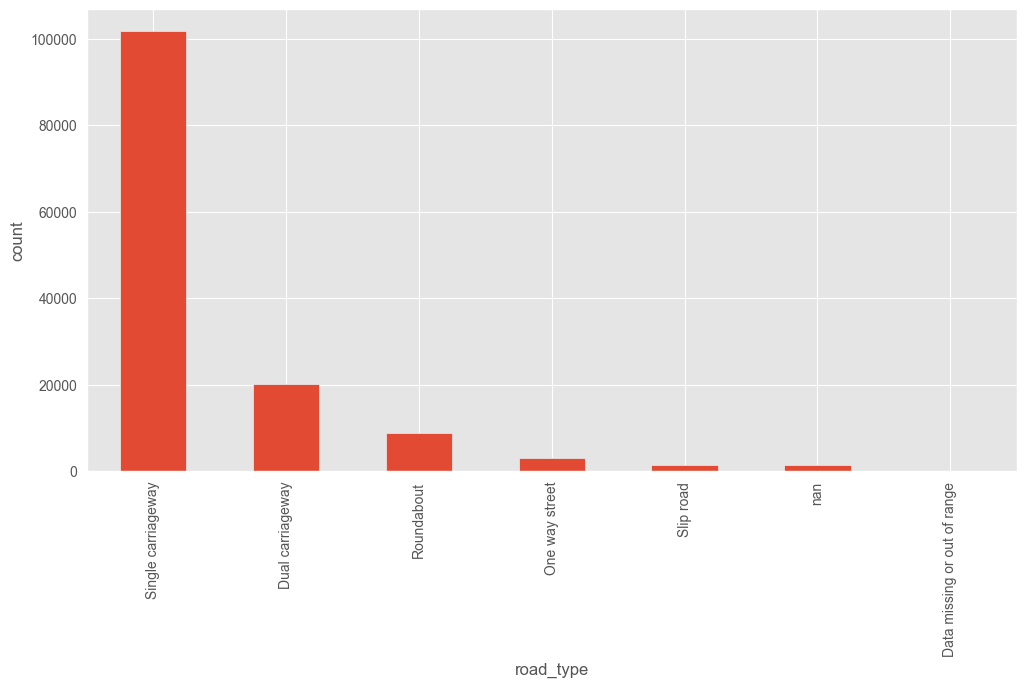

In [24]:
def visualize_cols_values_cnt(dataset, col_name, percentage=False, title=None):
    (dataset[col_name].value_counts(dropna=False) * ((100/len(dataset)) if percentage else 1) ).plot(kind='bar', xlabel=col_name, ylabel='count', title=title)
    

print('Values count of road type')
print(dataset['road_type'].value_counts(dropna=False))
visualize_cols_values_cnt(dataset, 'road_type')


Let's look at the road type missing values and there relation to the road class

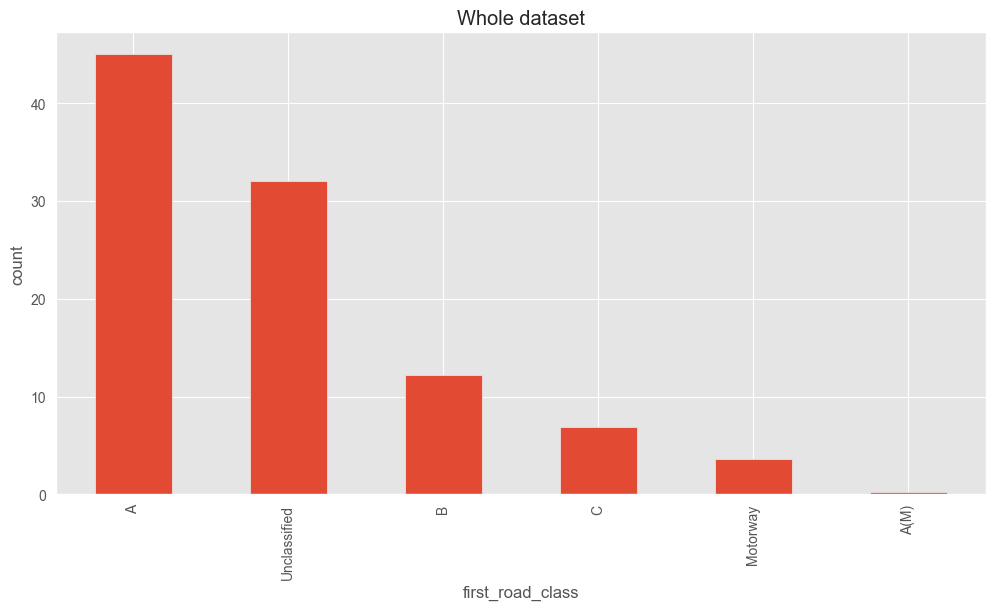

In [25]:
road_null_ds = dataset[dataset['road_type'].isna()]
visualize_cols_values_cnt(dataset, 'first_road_class', percentage=True, title="Whole dataset")

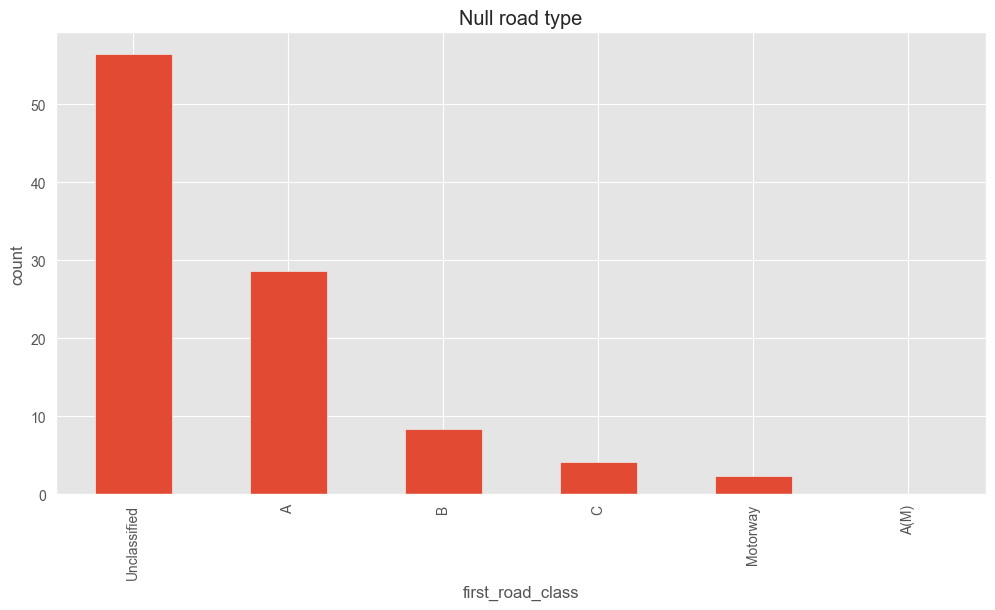

In [26]:
visualize_cols_values_cnt(road_null_ds, 'first_road_class', percentage=True, title="Null road type")

We can see that the percentage of unclassified roads in the missing data is higher than in the total data. This suggests that there might be a correlation between the road class being unclassified and its type to be missing. 
It's only 1% of the data and we should not worry much about it.

### Missing speed values

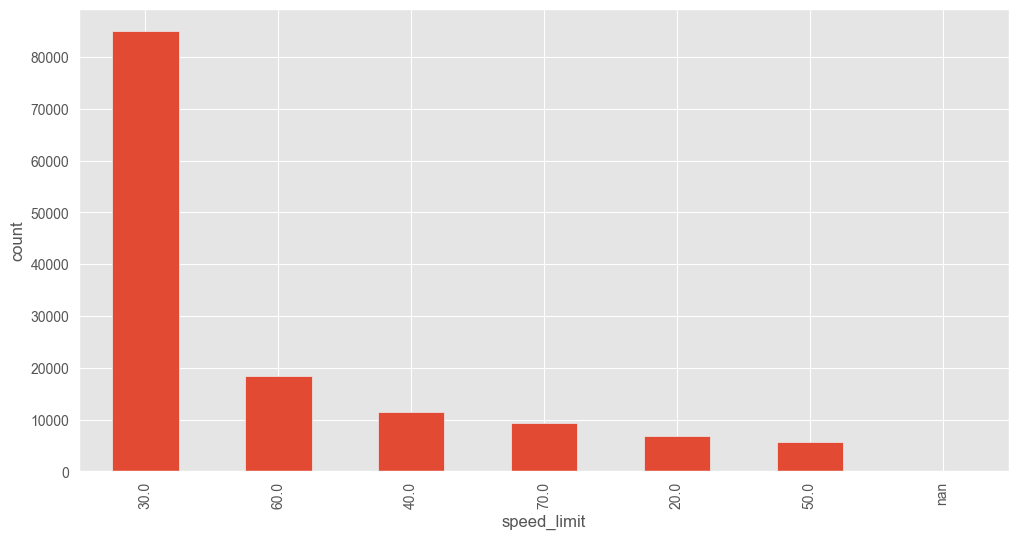

In [27]:
visualize_cols_values_cnt(dataset, 'speed_limit')

There might be a relation between the speed limit being missing and the road class.

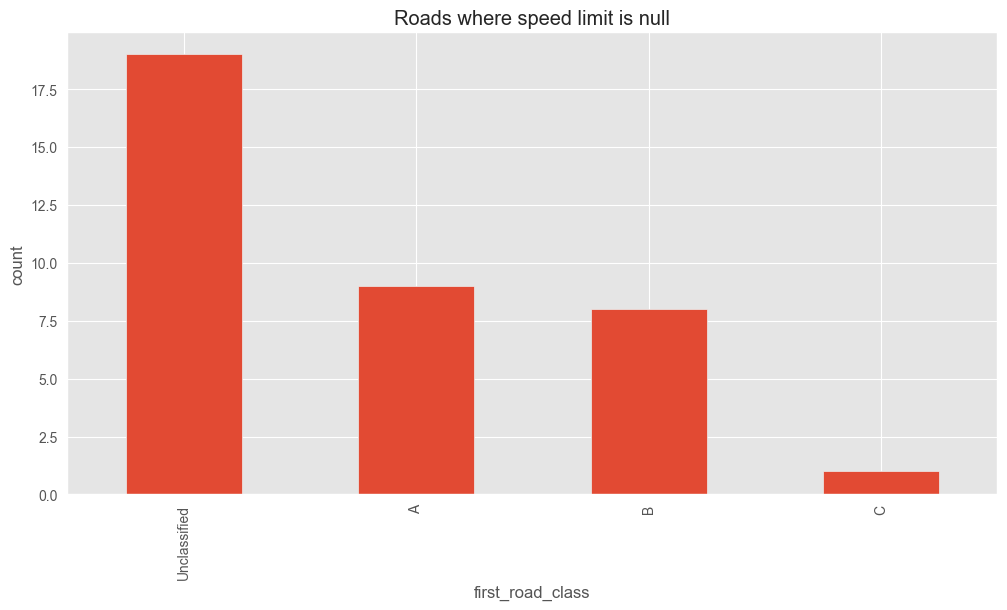

In [28]:
visualize_cols_values_cnt(dataset[dataset.speed_limit.isna()], 'first_road_class', title="Roads where speed limit is null")

There are only 37 missing values for speed limit and most of these roads are unclassified so it might the reason that the speed limit is missing.

### Missing second road values

42% of the records have this feature missing which is a very big number. It can be explained by the fact that most of the accidents happen at only one road and not a crosswalk.

Let's look at the junction type values distribution to understand why all these values are missing.

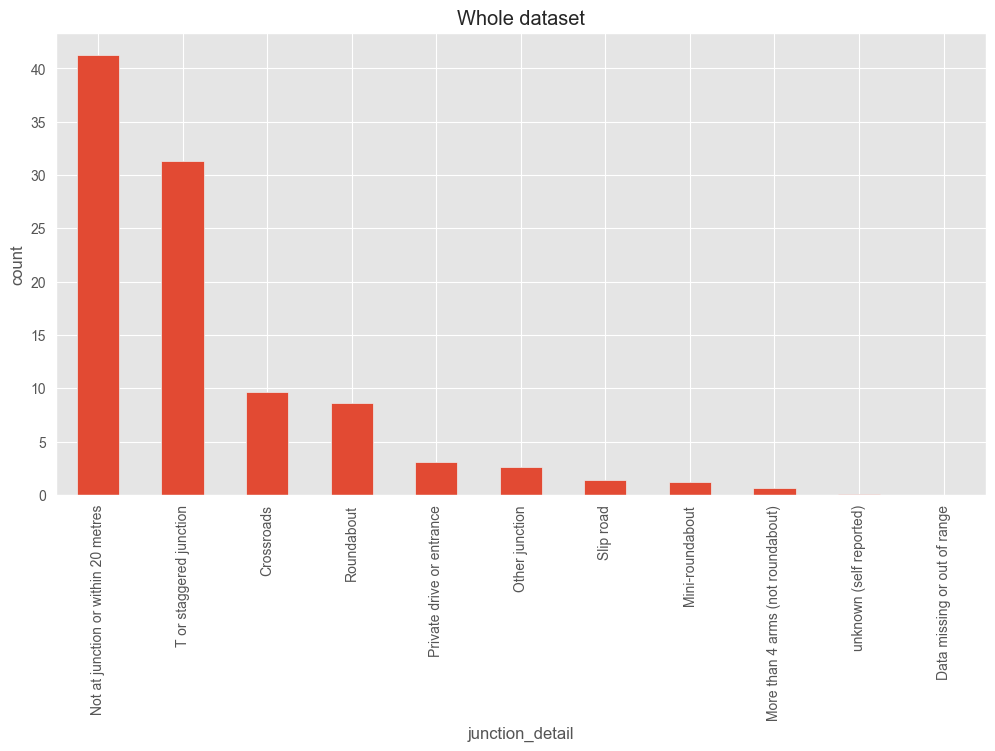

In [29]:
visualize_cols_values_cnt(dataset, 'junction_detail', percentage=True, title="Whole dataset")

The "Not a junction" value occurs around 42% of the dataset which is the same percentage as missing second road. This might be the reason for it to be missing.

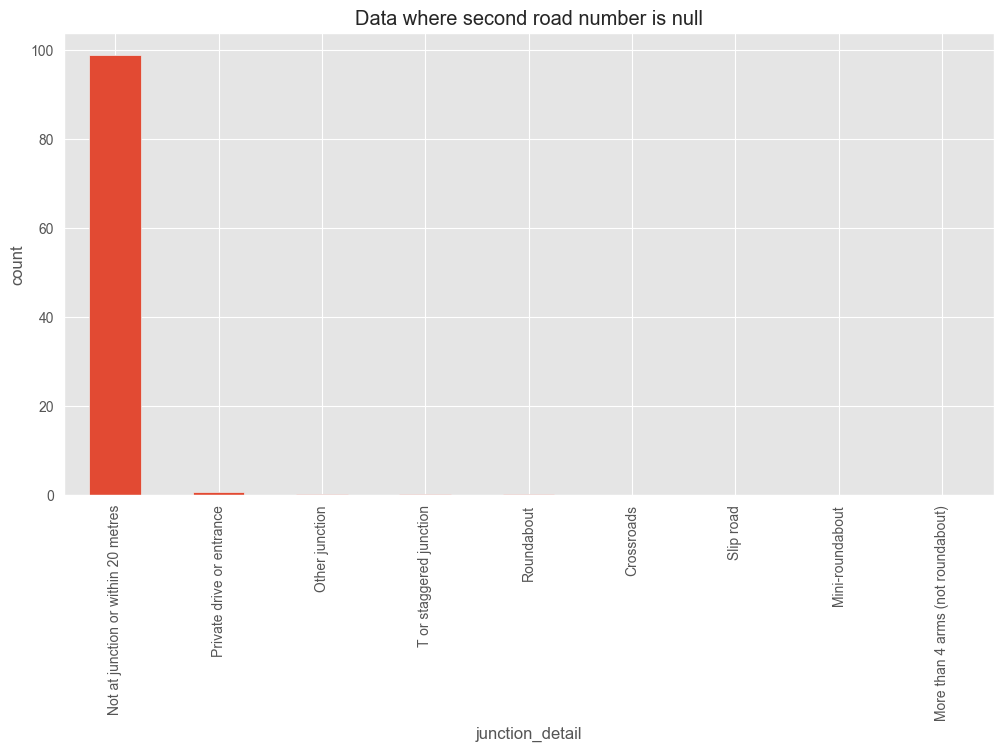

In [30]:

ds_null_2nd_road = dataset[dataset.second_road_number.isna()]
visualize_cols_values_cnt( ds_null_2nd_road, 'junction_detail', percentage=True,  title="Data where second road number is null")


From the above 2 charts we can see that almost 100% of the null values are coming from accidents happened not at a junction. This means that there's no second road at the first place. This is Missing At Random (MAR) type.   

### Missing weather condition values

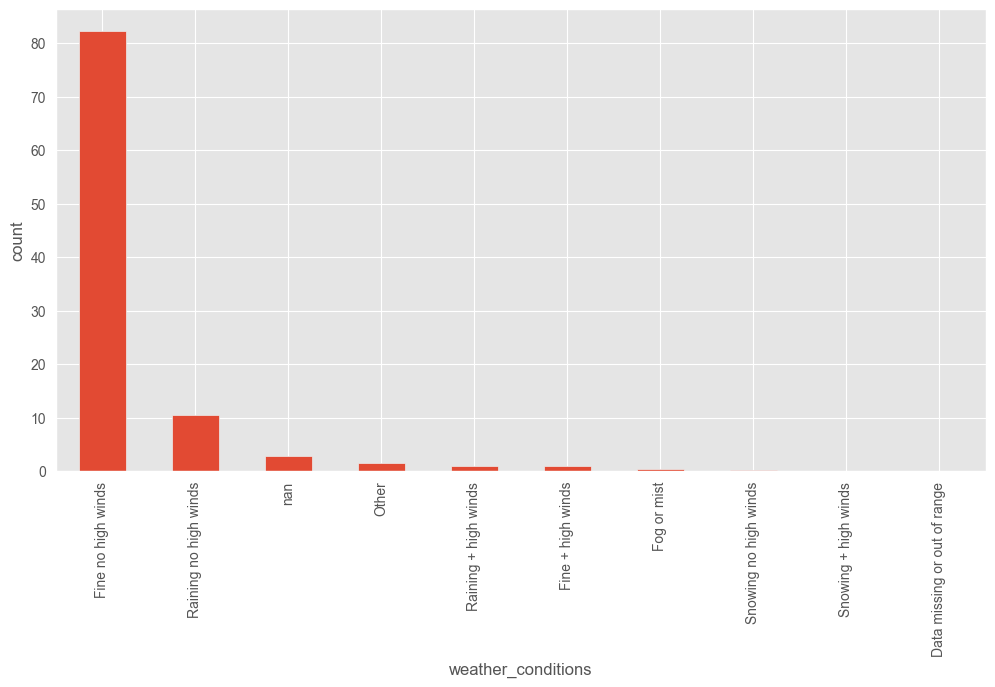

In [31]:
visualize_cols_values_cnt(dataset, 'weather_conditions', percentage=True)

Because this is weather data. It might be justified that the weather was not reported during some accidents. It can be treated under the category of "Data missing or out of range".

### Observing that "Data missing or out of range" is userd instead of NaN

Some of the values are set to the value 'Data missing or out of range' instead of NaN

In [32]:
nan_word = 'Data missing or out of range'
get_nan_count(dataset, percentage=True, nan_word=nan_word)

road_type                                   0.000732
junction_detail                             0.000732
junction_control                           41.443848
pedestrian_crossing_human_control           0.131019
pedestrian_crossing_physical_facilities     0.122236
light_conditions                            0.009515
weather_conditions                          0.009515
road_surface_conditions                     0.558479
carriageway_hazards                         0.075391
trunk_road_flag                             9.711538
dtype: float64

Let's look at the junction control because it has 41% missing values. It looks like it has the same issue as the second road missing values when there's no junction.

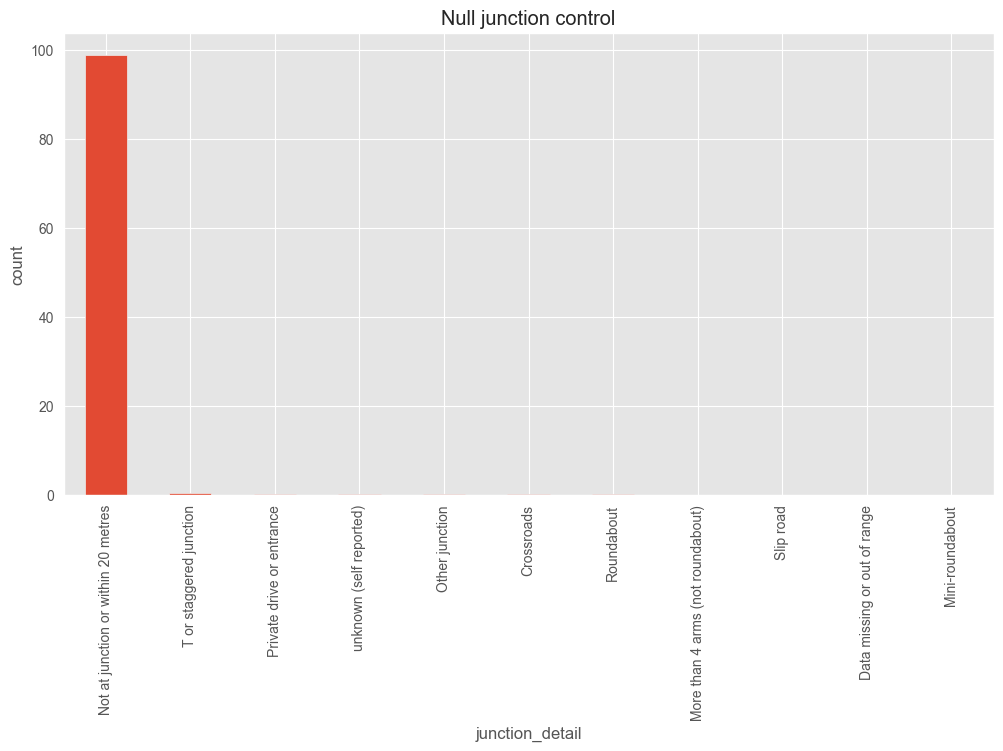

In [33]:
ds_null_junction_cont = dataset[dataset.junction_control == nan_word]
visualize_cols_values_cnt( ds_null_junction_cont, 'junction_detail', percentage=True,  title="Null junction control")

This confirms our hypothesis since most of the missing values happens when there are no junctions which means there is no junction control. This is MAR.

Let's look at trunk_road_flag which has %10 missing

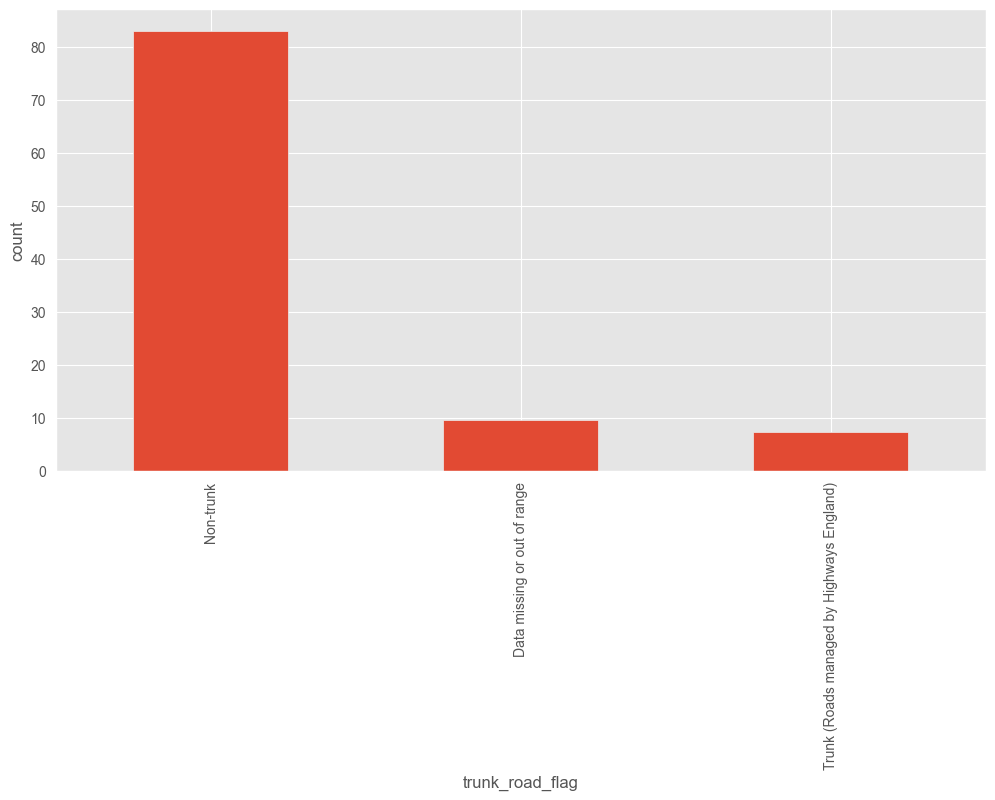

In [34]:
visualize_cols_values_cnt(dataset, 'trunk_road_flag', percentage=True)

I think it might be really missing for no reason (MCAR).

### None instead of NaN

Some of the values are set to the value 'None' instead of NaN

In [35]:
nan_word = 'None'
get_nan_count(dataset, percentage=True, nan_word=nan_word)

special_conditions_at_site    97.546497
carriageway_hazards           98.021534
dtype: float64

Let's look at the the values counts in these columns

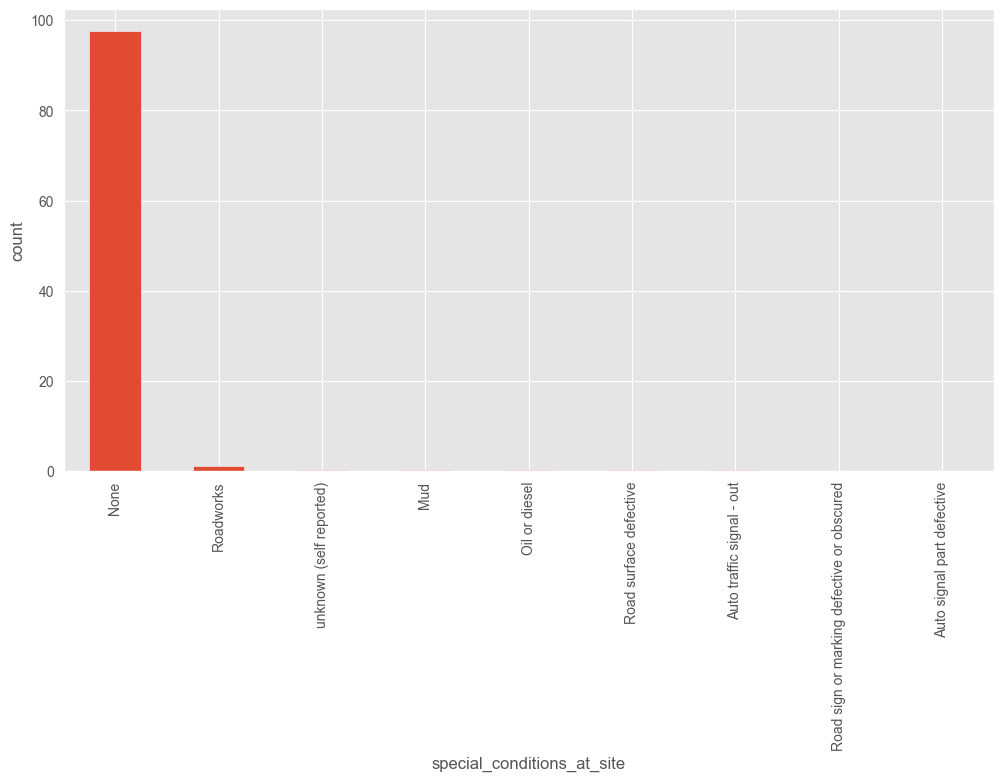

In [36]:
visualize_cols_values_cnt( dataset, 'special_conditions_at_site', percentage=True)

The values here mean that none is means that there were no special conditions at the site.

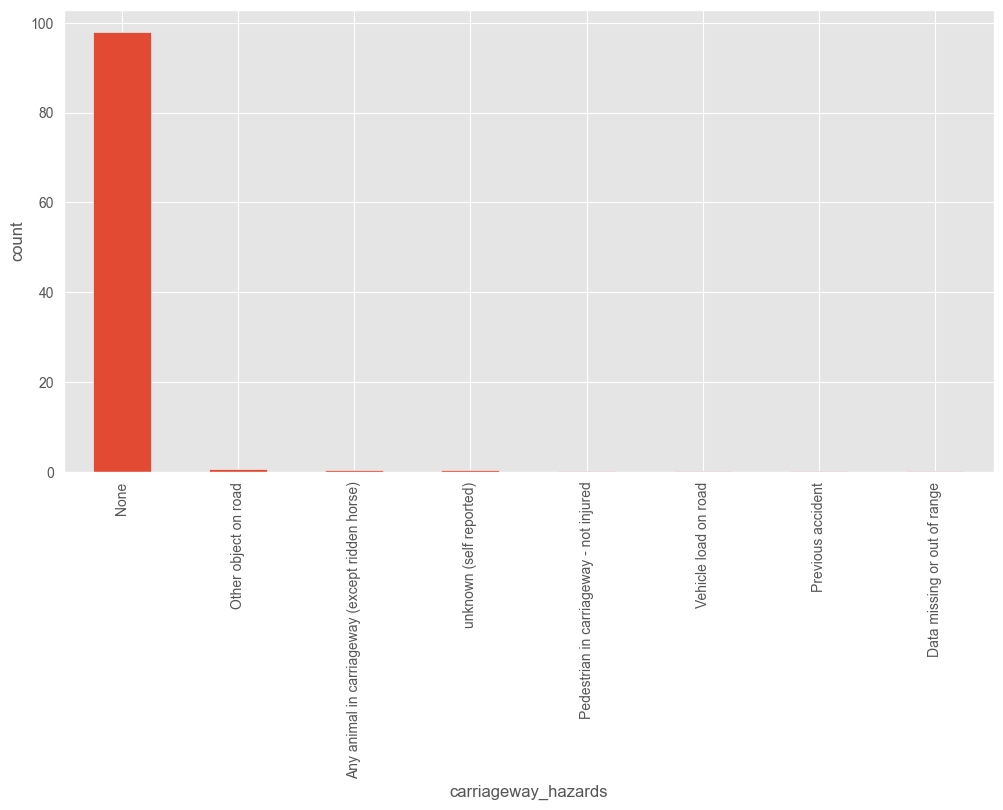

In [37]:
ds_null_junction_cont = dataset[dataset.junction_control == nan_word]
visualize_cols_values_cnt( dataset, 'carriageway_hazards', percentage=True)

The values here mean that none is means that there were no hazards on the road.

This concludes that None is not a missing value keyword

## Handling Missing data

Treat the other missing keywords as NaN

In [38]:
ds_clean = dataset.replace(['Data missing or out of range', 'unknown (self reported)'], np.nan)
get_nan_count(ds_clean, percentage=True)

location_easting_osgr                       0.005124
location_northing_osgr                      0.005124
longitude                                   0.005124
latitude                                    0.005124
road_type                                   1.024733
speed_limit                                 0.027082
junction_detail                             0.077587
junction_control                           41.445312
second_road_number                         41.726382
pedestrian_crossing_human_control           0.135411
pedestrian_crossing_physical_facilities     0.461862
light_conditions                            0.009515
weather_conditions                          2.800448
road_surface_conditions                     0.562871
special_conditions_at_site                  0.369636
carriageway_hazards                         0.399646
trunk_road_flag                             9.711538
dtype: float64

Let's remove all the rows where some values are set to NaN in the columns with less than 1% missing values

In [39]:
def remove_rows_with_nan_less_than(dataset: pd.DataFrame, threshold:float = 0):
    cnt = dataset.isna().sum()
    cnt = cnt[cnt > 0] 
    cnt = cnt * 100 / len(dataset)
    cnt = cnt[cnt < threshold]
    cols = cnt.index.to_list()
    return dataset.dropna(axis='index', subset=cols)
ds_clean = remove_rows_with_nan_less_than(ds_clean, threshold=1)
print(get_nan_count(ds_clean, percentage=True))
print('Removed percentage', (1 - len(ds_clean)/ len(dataset))*100)


road_type              0.834417
junction_control      41.275942
second_road_number    41.751907
weather_conditions     2.337699
trunk_road_flag        9.798676
dtype: float64
Removed percentage 0.9639806471918644


We will handle the MCAR values that has higher percentage than 1% by replacing them with the mode. Because they are categorical and replacing by the mode won't affect much since their % are not much. These are road_type, weather_conditions, trunk_road_flag.

In [40]:
def replace_nan_with_mode(dataset:pd.DataFrame, col_name):
    return dataset[col_name].fillna(dataset[col_name].mode()[0])


for col_name in ['road_type', 'weather_conditions', 'trunk_road_flag']:
    ds_clean[col_name] = replace_nan_with_mode(ds_clean, col_name)

get_nan_count(ds_clean, percentage=True)


junction_control      41.275942
second_road_number    41.751907
dtype: float64

Since the junction control and the second road number are missing from nearly half of the records and their abscense is explained by the value of the junction detail being set to no junction (MAR), I will keep them to avoid the data being biased and I will replace their nan values with a universal "None" that indicates there's no value here.

In [41]:
for col_name in ['junction_control', 'second_road_number']:
    ds_clean[col_name] = ds_clean[col_name].fillna('None')
get_nan_count(ds_clean, percentage=True)


Series([], dtype: float64)

Since the values for the second road class contain -1 to indicate that there's no second road and thus there is no class, we will convert the -1 to None to be consistent with others.

In [42]:
ds_clean.second_road_class = ds_clean.second_road_class.replace('-1', 'None')

### Findings and conclusions

There were not much missing values except for the junction situation. This was handled perfectly to reflect the missing values meaning. Now the dataset has no missing values.

## Handling unclean data

Let's inspect the values of some of the columns and ensure they are in good format.

The indicator features should have typically 2 values (true or false).

In [43]:
ds_clean.nunique()

accident_index                                 135304
accident_year                                       1
accident_reference                             135304
location_easting_osgr                           94221
location_northing_osgr                          96729
longitude                                      129428
latitude                                       128099
police_force                                       51
accident_severity                                   3
number_of_vehicles                                 14
number_of_casualties                               22
date                                              366
day_of_week                                         7
time                                             1440
local_authority_district                          380
local_authority_ons_district                      381
local_authority_highway                           208
first_road_class                                    6
first_road_number           

In [44]:
col_name = 'did_police_officer_attend_scene_of_accident'
ds_clean[col_name].value_counts()

Yes                                                                         103633
No                                                                           30574
No - accident was reported using a self completion  form (self rep only)      1097
Name: did_police_officer_attend_scene_of_accident, dtype: int64

It's more convenient to aggregate the two no options together.

In [45]:
ds_clean[col_name] = ds_clean[col_name].replace('No - accident was reported using a self completion  form (self rep only)', 'No')
ds_clean[col_name].value_counts()

Yes    103633
No      31671
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [46]:
# for col_name in ['day_of_week', 'first_road_class', 'second_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 
# 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions',
# 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'trunk_road_flag']:
#     print(ds_clean[col_name].value_counts())
#     print('-----------------------------------')

I looked at all the distinct values and they are all clean now.
I commented it to decrease the long scroll the notebook.

## Handling duplicate and useless data

In [47]:
ds_clean.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,02:30,Brent,Brent,Brent,A,4006,Single carriageway,30.0,Not at junction or within 20 metres,None,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,00:37,Bexley,Bexley,Bexley,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,01:25,Hillingdon,Hillingdon,Hillingdon,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,09:15,Merton,Merton,Merton,A,217,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,217.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,07:53,Hounslow,Hounslow,Hounslow,A,312,Dual carriageway,40.0,Not at junction or within 20 metres,None,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


The accident index and reference are both unique and identify an accident. We can remove the accident index because it's useless.

Let's also remove the accident year since all the values are 2016 and storing all of them would be a waste of memory.

In [48]:
ds_clean = ds_clean.drop(['accident_index', 'accident_year'], axis=1)
ds_clean.columns


Index(['accident_reference', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

Let's see if there are duplicate values

In [49]:
print('all columns', ds_clean.duplicated().sum())
print('accident reference', ds_clean.duplicated(['accident_reference']).sum())
all_cols_except_ref = ds_clean.columns.to_list()
all_cols_except_ref.remove('accident_reference')
print('all except reference', ds_clean.duplicated(all_cols_except_ref).sum())

all columns 0
accident reference 0
all except reference 6


If we compared all the feature values for duplicates we will not find any. If we consider all the values except the reference, there exist 6 duplicate values which shall be removed.

In [50]:
ds_clean = ds_clean.drop_duplicates(all_cols_except_ref)
print('all except reference', ds_clean.duplicated(all_cols_except_ref).sum())


all except reference 0


## Observing outliers

There are only a couple of numerical features that might contain outliers. Let's have a look at some of their stats.

In [51]:
ds_clean.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,135298.000000,1.352980e+05,135298.000000,135298.000000,135298.000000,135298.000000,135298.000000
mean,448278.298216,2.887785e+05,-1.311062,52.486391,1.849111,1.329332,37.984967
std,95383.289072,1.575378e+05,1.401275,1.418685,0.710392,0.791406,14.061562
min,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,20.000000
25%,385850.250000,1.763200e+05,-2.212812,51.473065,1.000000,1.000000,30.000000
50%,453622.500000,2.380975e+05,-1.209135,52.029078,2.000000,1.000000,30.000000
75%,527457.000000,3.903335e+05,-0.162852,53.407116,2.000000,1.000000,40.000000
max,655256.000000,1.178623e+06,1.757858,60.490191,16.000000,58.000000,70.000000


The number of vehicles ranges from [1:16] which is reasonable range for cars involved in an accident. A range of [1:58] is also okay for the number of casualties. 

The speed limit is already categorized into a couple of values in range [20:70] which indicates no outliers.

,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
75626,34NE09806,504003.0,290817.0,-0.469132,52.505308,Northamptonshire,Serious,2,58,14/07/2016,Thursday,15:58,East Northamptonshire,East Northamptonshire,Northamptonshire,C,first_road_class is C or Unclassified. These r...,Single carriageway,60.0,Crossroads,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Non-trunk,E01027044


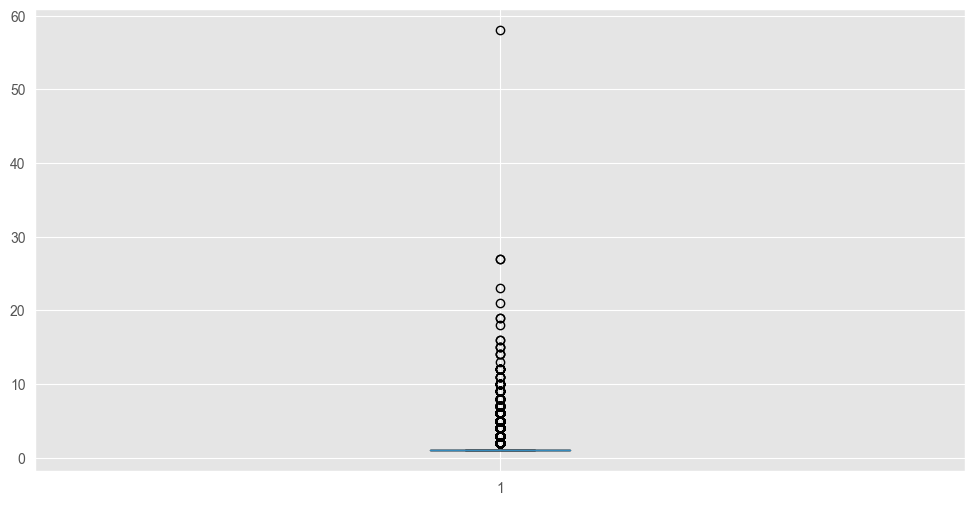

In [52]:
plt.boxplot(ds_clean.number_of_casualties)
ds_clean[ds_clean.number_of_casualties == 58]


Although there are many outliers according to the box plot. Looking at the accident info of the furthest point with 58 casualities makes sense as the severity is high.

To check the location outliars, I researched the uk min and max longitude [-8.62 : 1.77] and latitude [49.9 : 60.84] (src: https://gis.stackexchange.com/questions/152758/countries-latitude-and-longitude-range). Looking and the min and max of the values in the dataset implies that there are no outliers.

# 4 - Data transformation

## 4.1 - Discretization


### Converting date (Object) -> dateTime dataType


In [53]:
dataset_copy=ds_clean.copy()
dataset_copy['date'] =  pd.to_datetime(dataset_copy['date'], format='%d/%m/%Y')

In [54]:
dataset_copy.loc[:,"date"].head(2)


0   2016-11-01
1   2016-11-01
Name: date, dtype: datetime64[ns]

### Discretizing the data into weeks according to the dates.


In [55]:
ds_clean['Week number'] = dataset_copy['date'].dt.isocalendar().week


In [56]:
ds_clean.loc[:,["date","Week number"]].tail(2)


,date,Week number
136619,29/10/2016,43
136620,25/12/2016,51


## 4.11 - Findings and conclusions


This kind of discretisation is ***Equal frequency discretisation***


Equal width discretisation divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable:

width = (max value(Max number of days) - min value(min number of day) // 7

Having a discrete data not continues ones helps us to visualize and discover data more easily and efficiency


## 4.2 - Encoding
Encoding data is typically used to ensure the integrity and usability of data and is commonly used when data cannot be transferred in its current format between systems or applications.

We have three types of encoding techniques that we will use on our data, let's firstly mentioned them and why we need them.
That will help us in classifying the right encode system for each attribute
1. ***Label Encoding*** refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
2. ***One-hot*** encoding ensures that machine learning does not assume that higher numbers are more important. For example, the value '8' is bigger than the value '1', but that does not make '8' more important than '1'. The same is true for words: the value 'laughter' is not more important than 'laugh'
3. ***One Hot Encoding of Frequent Categories*** is just One-hot encoding can be used to handle a large number of categories also. How does it do this? Suppose 200 categories are present in a feature then only those 10 categories which are the top 10 repeating categories will be chosen and one-hot encoding is applied to only those categories.

Let's start with ***Label Encoding***
and analysis which attributes we need and why
1. ***accident_severity*** : this feature is a categorical one and has only 3 values that describes how danger was the accident, so assigning numerical value to it will help the machine to identify its meaning
2. ***light_conditions*** : this feature is a categorical one and has only 5 values that describes the light intensity through the accident, so assigning numerical value to it will help the machine to identify its meaning
3. ***weather_conditions***: this feature is a categorical one and has only 8 values that describes the weather through the accident, so assigning numerical value to it will help the machine to identify its meaning
4. ***road_surface_conditions***: this feature is a categorical one and has only 5 values that describes the road surface through the accident, so assigning numerical value to it will help the machine to identify its meaning

***We will give them values based on their meaning to avoid the machine encode which can lead to unreal numeric value***

In [57]:
print(ds_clean["accident_severity"].unique())


['Slight' 'Serious' 'Fatal']


In [58]:
print(ds_clean["light_conditions"].unique())


['Darkness - lights unlit' 'Darkness - lights lit' 'Daylight'
 'Darkness - no lighting' 'Darkness - lighting unknown']


In [59]:
print(ds_clean["weather_conditions"].unique())


['Fine no high winds' 'Raining no high winds' 'Fog or mist' 'Other'
 'Fine + high winds' 'Raining + high winds' 'Snowing no high winds'
 'Snowing + high winds']


In [60]:
print(ds_clean["road_surface_conditions"].unique())


['Dry' 'Wet or damp' 'Flood over 3cm. deep' 'Frost or ice' 'Snow']


In [61]:
print(ds_clean["did_police_officer_attend_scene_of_accident"].unique())


['Yes' 'No']


In [62]:
print(ds_clean["trunk_road_flag"].unique())


['Non-trunk' 'Trunk (Roads managed by Highways England)']


In [63]:
label_encoded_values={'accident_severity':{'Slight':1,'Serious':2,'Fatal':3},
                      'light_conditions':{'Daylight':1,'Darkness - lights lit':2, 'Darkness - lights unlit':3,'Darkness - no lighting':4,'Darkness - lighting unknown':0},
                      'weather_conditions':{'Fine no high winds':1, 'Fine + high winds':2, 'Raining no high winds':3,'Raining + high winds':4, 'Snowing no high winds':5,'Snowing + high winds':6,'Fog or mist':7 ,'Other':0},
                      'road_surface_conditions':{'Dry':1,'Wet or damp':2,'Flood over 3cm. deep':3,'Frost or ice':4,'Snow':5},
                      'did_police_officer_attend_scene_of_accident':{'Yes':1,"No":0},
                      'trunk_road_flag':{'Trunk (Roads managed by Highways England)':1,'Non-trunk':0}}

In [64]:
# Function to encode categorical attributes in a given dataset as numbers
def number_encode_features(df,label_encoded_values_replacement):
    result = df.copy() # take a copy of the dataframe
    return result.replace(label_encoded_values_replacement)

In [65]:
# Apply function defined above to accidents dataset
encoded_data = number_encode_features(ds_clean,label_encoded_values)

# Display last 5 records in transformed dataset to verify numerical transformation
encoded_data.loc[:,["accident_severity","light_conditions",'weather_conditions',"road_surface_conditions","did_police_officer_attend_scene_of_accident","trunk_road_flag"]].tail(5)

,accident_severity,light_conditions,weather_conditions,road_surface_conditions,did_police_officer_attend_scene_of_accident,trunk_road_flag
136616,1,2,1,2,1,0
136617,1,1,1,1,1,0
136618,1,4,1,2,1,0
136619,1,2,1,1,1,0
136620,1,1,4,2,1,0


In [66]:
#this function working on saving the label encoded dataset columns in a new csv
def save_label_encoded_columns_to_csv(column1_name,column2_name,column1_df,column2_df,csv_name):
    temp= pd.DataFrame()
    temp[column1_name]=column1_df
    temp[column2_name]=column2_df
    temp.to_csv(csv_name)

In [67]:
save_label_encoded_columns_to_csv("accident_severity","accident_severity_encoded",ds_clean.accident_severity,encoded_data.accident_severity,'./label_encoded/'+"accident_severity_label_encoded")
save_label_encoded_columns_to_csv("light_conditions","light_conditions_encoded",ds_clean.light_conditions,encoded_data.light_conditions,'./label_encoded/'+"light_conditions_label_encoded")
save_label_encoded_columns_to_csv("weather_conditions","weather_conditions_encoded",ds_clean.weather_conditions,encoded_data.weather_conditions,'./label_encoded/'+"weather_conditions_label_encoded")
save_label_encoded_columns_to_csv("road_surface_conditions","road_surface_conditions_encoded",ds_clean.road_surface_conditions,encoded_data.road_surface_conditions,'./label_encoded/'+"road_surface_conditions_label_encoded")
save_label_encoded_columns_to_csv("did_police_officer_attend_scene_of_accident","did_police_officer_attend_scene_of_accident_encoded",ds_clean.did_police_officer_attend_scene_of_accident,encoded_data.did_police_officer_attend_scene_of_accident,'./label_encoded/'+"did_police_officer_attend_scene_of_accident_label_encoded")
save_label_encoded_columns_to_csv("trunk_road_flag","trunk_road_flag_encoded",ds_clean.trunk_road_flag,encoded_data.trunk_road_flag,'./label_encoded/'+"trunk_road_flag_label_encoded")

Now let's jump to the other type of encoding which is ***one_hot_encoding*** we will apply it on other categorical data that we didn't include in the label encoding


***First Step***: we should first define which columns we will apply one hot encoding on it, we will do that by including dtype='object' only

In [68]:
encoded_data=encoded_data.drop(['accident_reference', 'lsoa_of_accident_location','date','time'], axis=1)

In [69]:
def get_categorical_data(df):
    return df.select_dtypes(include = "object").columns.tolist()

In [70]:
print(get_categorical_data(encoded_data))


['police_force', 'day_of_week', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area']


***Second Step***: we will loop over the selected features and apply one hot encode only to the top 10 freq values in them

In [71]:
# calculate top categories of variable in a dataframe
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

#apply one hot encode to the top_x_labels of variable of a dataframe and save them in a csv file on disk
def one_hot_encode(df, variable, top_x_labels):
    df_temp = pd.DataFrame()
    for label in top_x_labels:
        df_temp[label] = np.where(
            df[variable] == label, 1, 0)
    df_temp.to_csv(r"./OneHotEncoded/"+variable, sep='\t')

def apply_one_hot_encode_on_df(df):
    features=get_categorical_data(df)
    for feature in features:
        top_x_labels=calculate_top_categories(df,feature,10) #10 maximum
        one_hot_encode(df,feature,top_x_labels)

In [72]:
apply_one_hot_encode_on_df(encoded_data.copy())


## 4.22 - Findings and conlcusions


***Label encoding***
- Pros:
    1. Straightforward to implement
    2. Does not expand the feature space
- cons:
  should be used with high precautions, we should try to get the best features that suitable for it and not run a general encoding to avoid such this mistake:
The problem using the number is that they introduce relation/comparison between them. Let’s consider another column named ‘Safety Level’ that has the values none < low < medium < high < very high. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order 0 < 1 < 2 < 3 < 4 i.e. none < low < medium < high < very high.

***One hot encoding***
- Pros:
    1. Does not add any information that may make the variable more predictive
    2. Does not keep the information of the ignored labels
- Cons:
    1. Memory consumption for large attributes
    2. When we're applying a threshold to avoid the first one, we have another limitations like:
       - Does not add any information that may make the variable more predictive
        - Does not keep the information of the ignored labels

## 4.3 - Normalisation

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3936\3807337554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds_clean["longitude"], ax=ax[0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3936\3807337554.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds_clean["latitude"], ax=ax[1])


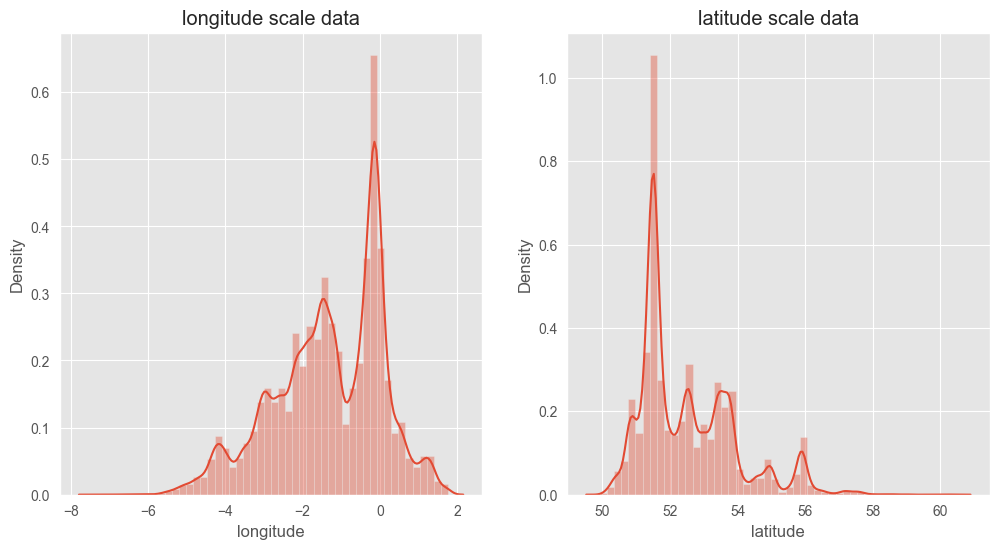

In [73]:
fig, ax=plt.subplots(1,2)
sns.distplot(ds_clean["longitude"], ax=ax[0])
ax[0].set_title("longitude scale data")
sns.distplot(ds_clean["latitude"], ax=ax[1])
ax[1].set_title("latitude scale data")
plt.show()

In [74]:
ds_clean.loc[:,["longitude","latitude"]].describe()

,longitude,latitude
count,135298.000000,135298.000000
mean,-1.311062,52.486391
std,1.401275,1.418685
min,-7.389809,49.919716
25%,-2.212812,51.473065
50%,-1.209135,52.029078
75%,-0.162852,53.407116
max,1.757858,60.490191


As we can notice the longitude and latitude have different scale, so we should rescale them into the same range to have the same effect when feeding
into a machine learning model

Now we will renormalize them using Scaling technique to have a range between 0 and 1


In [77]:
longitude_after_scaling,latitude_after_scaling =  MinMaxScaler().fit_transform(ds_clean[["longitude"]]),MinMaxScaler().fit_transform(ds_clean[["latitude"]])

## 4.31 - Findings and conclusions


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3936\97550941.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(longitude_after_scaling, ax=ax[0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3936\97550941.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(latitude_after_scaling, ax=ax[1])


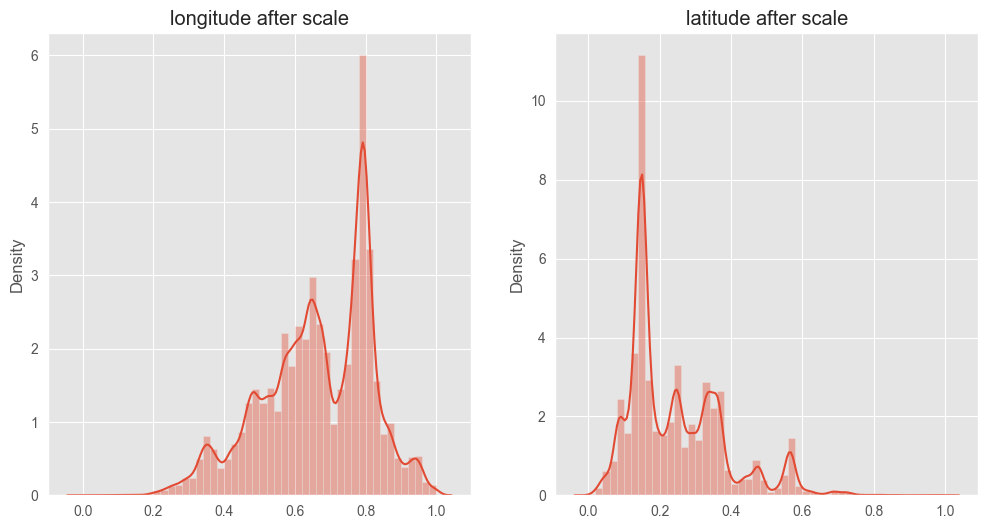

In [78]:
fig, ax=plt.subplots(1,2)
sns.distplot(longitude_after_scaling, ax=ax[0])
ax[0].set_title("longitude after scale")
sns.distplot(latitude_after_scaling, ax=ax[1])
ax[1].set_title("latitude after scale")
plt.show()

***Scaling in a very important step in norimlizing data***
- Scaling is used to make all features contribute the same amount in prediction.
- Scaling makes the algorithms converge faster since it transform the variable space in to a much smaller range.

In [79]:
#saving new scaling values in a new data frame
temp_df=pd.DataFrame()
temp_df["longitude"]=longitude_after_scaling.tolist()
temp_df["latitude"]=latitude_after_scaling.tolist()
save_label_encoded_columns_to_csv("longitude","latitude",temp_df.longitude,temp_df.latitude,"./norimlization/longitude_latitude_after_scaling")

## 4.4 - Adding more columns


The data we have, we can make best use of it, by extracting new attributes from it.
***We could detect a new column that shows whether the accident happened on the weekend(1) or not(0)***

In [80]:
ds_clean["accident_on_weekend"]= np.where((ds_clean["day_of_week"] =="Saturday") |  (ds_clean["day_of_week"] == "Sunday"), 1, 0)
ds_clean.loc[:,["day_of_week","accident_on_weekend"]].tail(5)

,day_of_week,accident_on_weekend
136616,Friday,0
136617,Tuesday,0
136618,Thursday,0
136619,Saturday,1
136620,Sunday,1


***We can also extract when the accident happened using the feature time to detect weather Morning, Afternoon, Evening and Night***

In [81]:
# converting time Object format to datetime format
ds_clean['time'] = pd.to_datetime(ds_clean['time'],format= '%H:%M')
ds_clean.loc[ds_clean['time'].dt.hour<12, ['day_time']] = 'Morning'
ds_clean.loc[(ds_clean['time'].dt.hour>=12) & (ds_clean['time'].dt.hour<19), ['day_time']] = 'Afternoon'
ds_clean.loc[(ds_clean['time'].dt.hour>=19) & (ds_clean['time'].dt.hour<19), ['day_time']] = 'Evening'
ds_clean.loc[(ds_clean['time'].dt.hour>=19) & (ds_clean['time'].dt.hour<24), ['day_time']] = 'Night'
ds_clean['time'] = pd.to_datetime(ds_clean['time'],format= '%H:%M:%S').dt.time
ds_clean.loc[:,["time","day_time"]].tail(5)

,time,day_time
136616,06:45:00,Morning
136617,16:45:00,Afternoon
136618,07:10:00,Morning
136619,20:00:00,Night
136620,12:30:00,Afternoon


## 4.41 - Findings and concluisons


Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features). These new reduced set of features should then be able to summarize most of the information contained in the original set of features.

## 4.5 - Csv file for lookup


In [82]:
# let's save our final dataset into a new one after cleaning and applying transormation
ds_clean.to_csv("final_accidents_uk")

## 5- Exporting the dataframe to a csv file or parquet


In [83]:
df = pd.read_csv('final_accidents_uk',index_col=0)
df.astype(str).to_parquet('final_accidents_uk.parquet')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3936\2188962871.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_accidents_uk',index_col=0)


In [84]:
df=pd.read_parquet('final_accidents_uk.parquet')
df.head(5)

,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,accident_on_weekend,day_time
0,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,02:30:00,Brent,Brent,Brent,A,4006,Single carriageway,30.0,Not at junction or within 20 metres,None,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543,44,0,Morning
1,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,00:37:00,Bexley,Bexley,Bexley,A,207,Single carriageway,30.0,Other junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375,44,0,Morning
2,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,01:25:00,Hillingdon,Hillingdon,Hillingdon,A,4020,Roundabout,30.0,Roundabout,Give way or uncontrolled,A,4020.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725,44,0,Morning
3,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,01/11/2016,Tuesday,09:15:00,Merton,Merton,Merton,A,217,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,217.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379,44,0,Morning
4,010000018,510740.0,177230.0,-0.40658,51.483139,Metropolitan Police,Slight,2,1,01/11/2016,Tuesday,07:53:00,Hounslow,Hounslow,Hounslow,A,312,Dual carriageway,40.0,Not at junction or within 20 metres,None,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583,44,0,Morning
